In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [106]:
df = pd.read_csv('./loans_fs.csv', index_col=0)

/Users/timong/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


At Funding Societies, we use various data sources to assess the suitability of a borrower on our platform. We predict the willingness and ability of a borrower to repay us. This is a dataset of personal loans and the variables utilised to make lending decisions. 

Your task would be to summarise the data and perform some initial analysis on it with a focus on the factors that drive lending decisions.

Feel free to use any software to process, analyse, model and present your findings. The idea here is to give you a realistic experience of the work we do. Please send across all workings including your code and any working files. 

What we want to look at is your thought process in approaching the problem and so, please explain how you are cleaning and dissecting the data and why you are using any particular methods. All the best!


loan_amnt: amount of loan applied for by the borrower

funded_amnt: total amount committed to that loan at that point of time

funded_amnt_inv: total amount committed by investors for that loan at that point in time

empy_title: the job title supplied by the Borrower when applying for the loan

verification_status: indicates if income was verified by LC, not verified, or if the income source was verified

issue_d: the month which the loan was funded

pymnt_plan: indicates if a payment plan has been put in place for the loan

dti: a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [107]:
df.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti
0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72


In [108]:
df.term.unique()

array([' 36 months', ' 60 months', '600 months'], dtype=object)

In [109]:
df.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [111]:
df['term2'] = [int(i.split()[0]) for i in df.term]
df = (
    df
    .pipe(lambda x: x.assign(payment_plan = np.where(x.pymnt_plan=='n',1,0)))
    .drop(['term', 'pymnt_plan'], axis=1)
    .rename(columns={"term2": "term"})
)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 24 columns):
member_id              887379 non-null int64
loan_amnt              887379 non-null float64
funded_amnt            887379 non-null float64
funded_amnt_inv        887379 non-null float64
int_rate               887379 non-null float64
installment            887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_title              835917 non-null object
emp_length             842554 non-null object
home_ownership         887379 non-null object
annual_inc             887375 non-null float64
verification_status    887379 non-null object
issue_d                887379 non-null object
loan_status            887379 non-null object
url                    887379 non-null object
desc                   126028 non-null object
purpose                887379 non-null object
title                  887227 non-null object
zip_code  

In [71]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [70]:
df.loan_status.value_counts()

Current                                                597271
Fully Paid                                             206166
Charged Off                                             44912
Late (31-120 days)                                      11499
In Grace Period                                          6213
Late (16-30 days)                                        2337
Does not meet the credit policy. Status:Fully Paid       1976
Default                                                  1213
Does not meet the credit policy. Status:Charged Off       757
Name: loan_status, dtype: int64

In [77]:
fully_paid = df.query("loan_status=='Fully Paid'")
effy = df.query("loan_status =='Does not meet the credit policy. Status:Fully Paid'")

In [78]:
fully_paid.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,2.061660e+05,206166.000000,2.061660e+05,206166.000000,206166.000000,206166.000000,2.061660e+05,2.061660e+05
mean,1.386835e+07,14161.680879,1.480704e+04,13219.147069,13.331721,413.139794,7.696922e+04,-3.125179e+03
std,1.628014e+07,15452.568592,6.690401e+04,8053.417853,4.682235,244.179712,1.013761e+05,8.355176e+04
min,7.069900e+04,500.000000,-2.000000e+05,0.000000,1.000000,15.690000,-5.000000e+04,-2.500000e+06
25%,1.684134e+06,7200.000000,7.000000e+03,7000.000000,10.160000,234.377500,4.500000e+04,1.035000e+01
50%,7.449496e+06,12000.000000,1.200000e+04,11700.471902,13.110000,360.080000,6.400000e+04,1.571000e+01
75%,1.922561e+07,18000.000000,1.800000e+04,18000.000000,16.000000,540.545000,9.000000e+04,2.145000e+01
max,7.350742e+07,250000.000000,2.500000e+06,35000.000000,28.990000,1409.990000,7.141778e+06,5.714000e+01


In [76]:
effy.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,1976.000000,1976.000000,1.976000e+03,1976.000000,1976.000000,1976.000000,1.972000e+03,1.976000e+03
mean,467930.401316,9894.825405,1.106607e+04,6423.460524,13.422743,287.551225,7.433065e+04,-3.391823e+03
std,213173.949263,15614.561631,7.951404e+04,5944.471361,3.660910,204.293623,1.051943e+05,8.489865e+04
min,70473.000000,500.000000,-5.000000e+04,0.000000,1.000000,15.670000,-5.000000e+04,-2.500000e+06
25%,288368.750000,4075.000000,4.000000e+03,1975.000000,11.860000,135.990000,3.800000e+04,8.217500e+00
50%,459222.500000,7200.000000,7.000000e+03,4800.000000,13.850000,230.495000,5.700000e+04,1.445000e+01
75%,651029.250000,12000.000000,1.200000e+04,9403.167645,15.450000,390.722500,8.500000e+04,2.000000e+01
max,822719.000000,250000.000000,2.500000e+06,25000.000000,27.700000,940.140000,2.500000e+06,2.995000e+01


In [59]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,8.807380e+05,880738.000000,8.807380e+05,880738.000000,880738.000000,880738.000000,8.807340e+05,8.807380e+05
mean,3.499909e+07,15554.446527,1.614215e+04,14701.383153,13.243193,436.684319,7.759617e+04,-2.859317e+03
std,2.411448e+07,15515.969260,6.519445e+04,8440.832553,4.772118,244.152557,1.022653e+05,7.973133e+04
min,7.047300e+04,500.000000,-2.000000e+05,0.000000,1.000000,15.670000,-5.000000e+04,-2.500000e+06
25%,1.086997e+07,8000.000000,8.000000e+03,8000.000000,9.990000,260.730000,4.500000e+04,1.184000e+01
50%,3.708669e+07,13000.000000,1.300000e+04,13000.000000,12.990000,382.550000,6.468000e+04,1.761000e+01
75%,5.847161e+07,20000.000000,2.000000e+04,20000.000000,16.290000,572.427500,9.000000e+04,2.392000e+01
max,7.354484e+07,250000.000000,2.500000e+06,35000.000000,28.990000,1445.460000,9.500000e+06,9.999000e+03


In [68]:
df = df.query("loan_amnt>=0 and loan_status!='Issued' ")

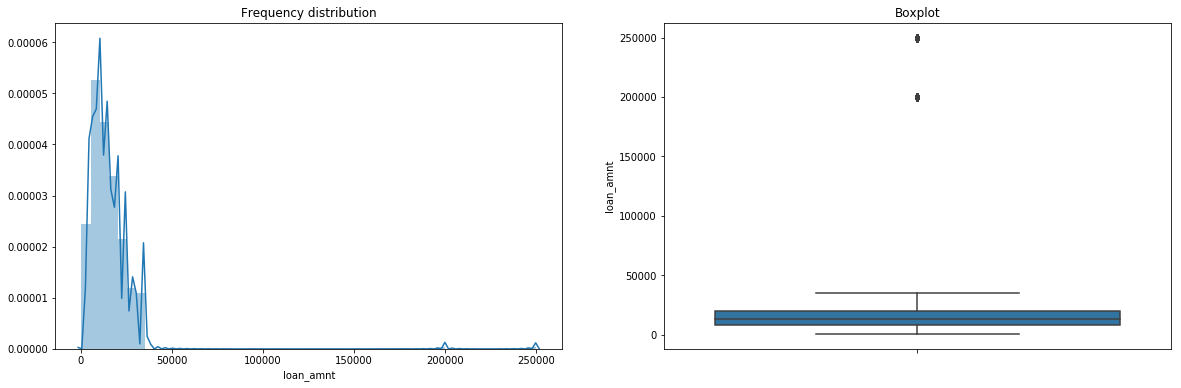

In [69]:
_ = plt.figure(figsize=(20,6))
_ = plt.subplot(121)
_ = sns.distplot(df.loan_amnt)
_ = plt.title('Frequency distribution')

_ = plt.subplot(122)
_ = sns.boxplot(x='loan_amnt', data=df, orient='v')
_ = plt.title('Boxplot')